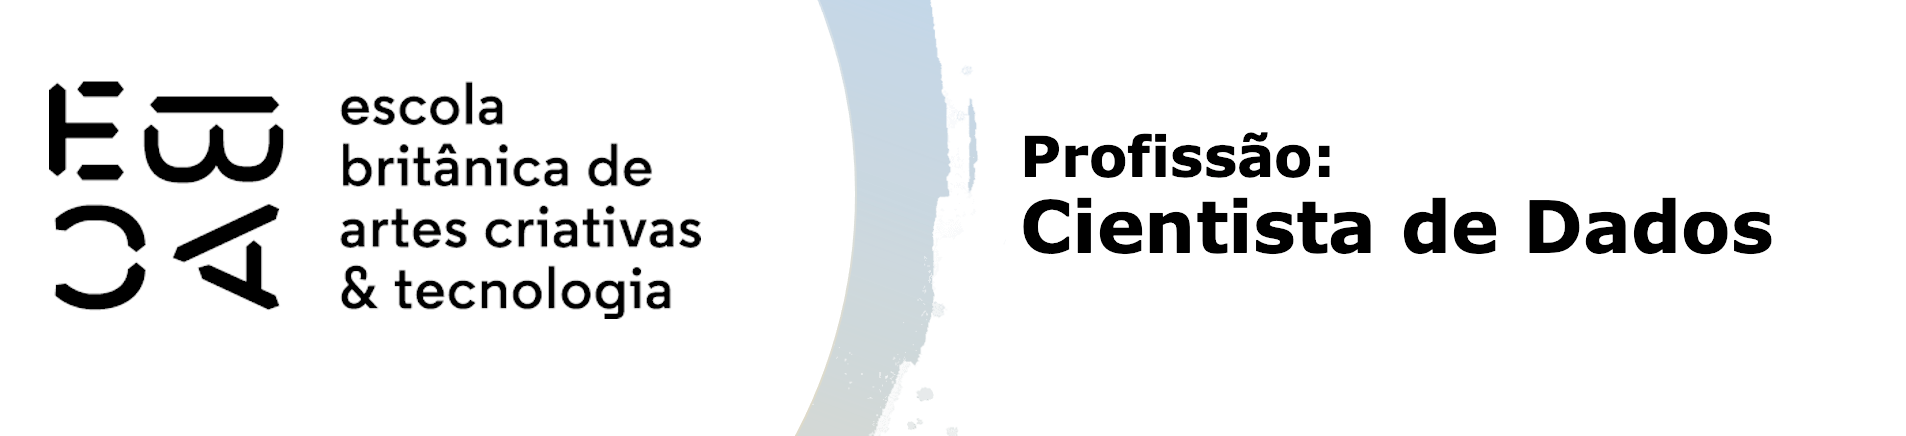

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
data = sns.load_dataset('penguins')
data.index.name='id'
data_num = data.select_dtypes(include='number').dropna()
data_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
id,,,,
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [3]:
padronizador = StandardScaler()
data_pad = padronizador.fit_transform(data_num)

In [4]:
clus = AgglomerativeClustering(linkage='complete',
                               distance_threshold = None,
                               n_clusters=3)
clus.fit(data_pad)

data_num['grupo'] = clus.labels_
data_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


In [5]:
data1 = data.merge(data_num['grupo'], how='left', on='id')
data1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


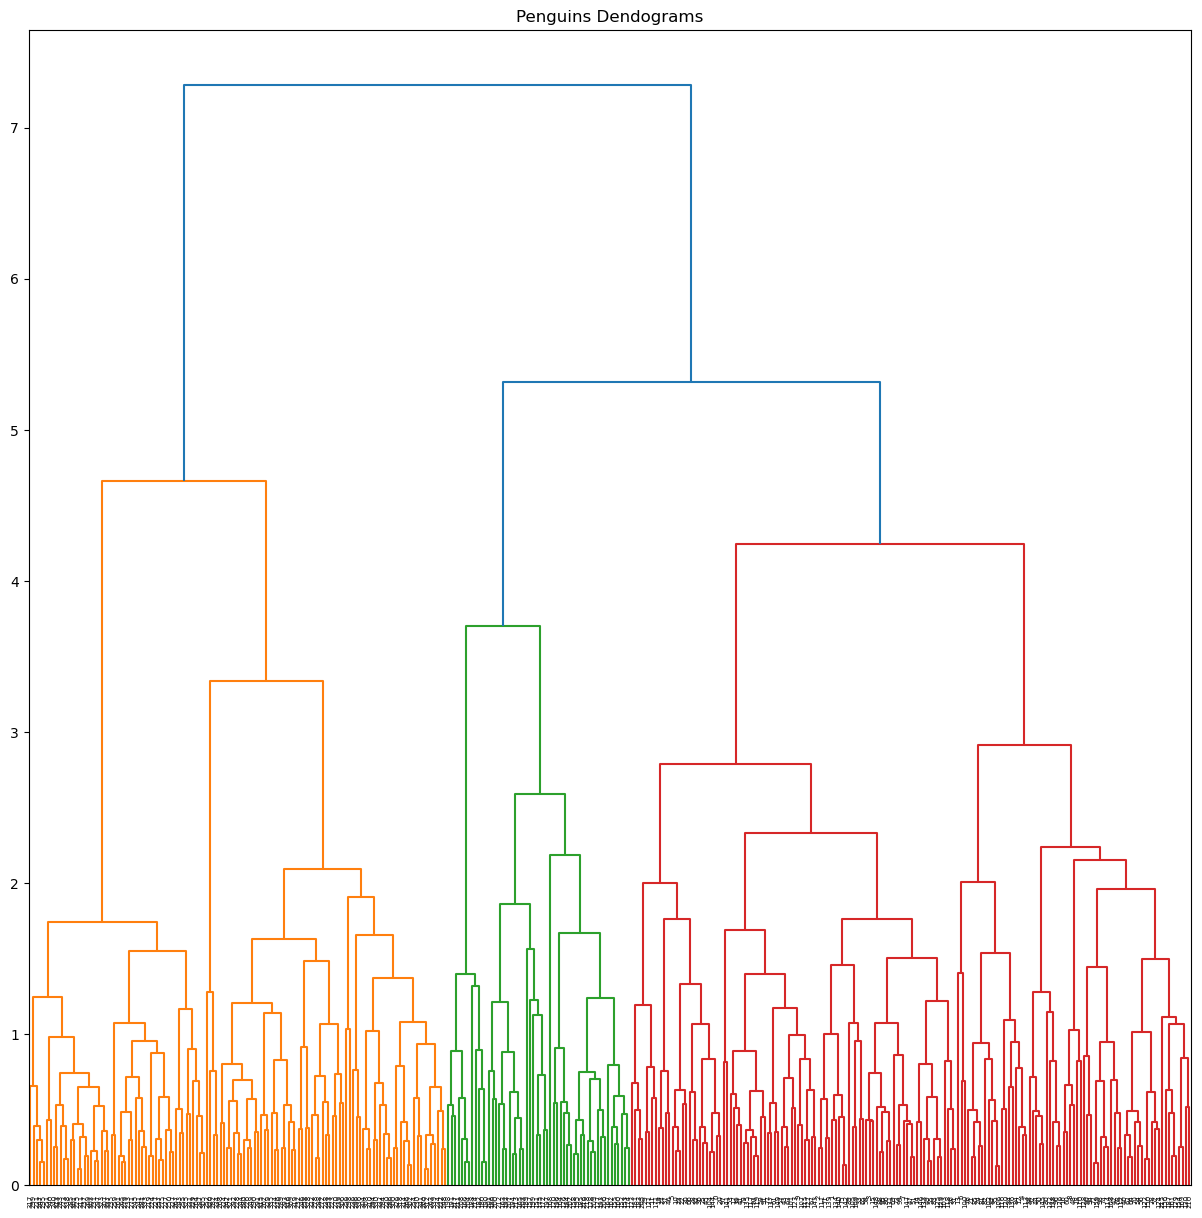

In [6]:
plt.figure(figsize=(15,15))
plt.title('Penguins Dendograms')
dend = shc.dendrogram(shc.linkage(data_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [7]:
pd.crosstab(data1['species'], data1['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   grupo              342 non-null    float64
dtypes: float64(5), object(3)
memory usage: 24.2+ KB


In [9]:
data1.select_dtypes(include='number').dropna()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1.0
1,39.5,17.4,186.0,3800.0,1.0
2,40.3,18.0,195.0,3250.0,1.0
4,36.7,19.3,193.0,3450.0,1.0
5,39.3,20.6,190.0,3650.0,1.0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0.0
340,46.8,14.3,215.0,4850.0,0.0
341,50.4,15.7,222.0,5750.0,0.0


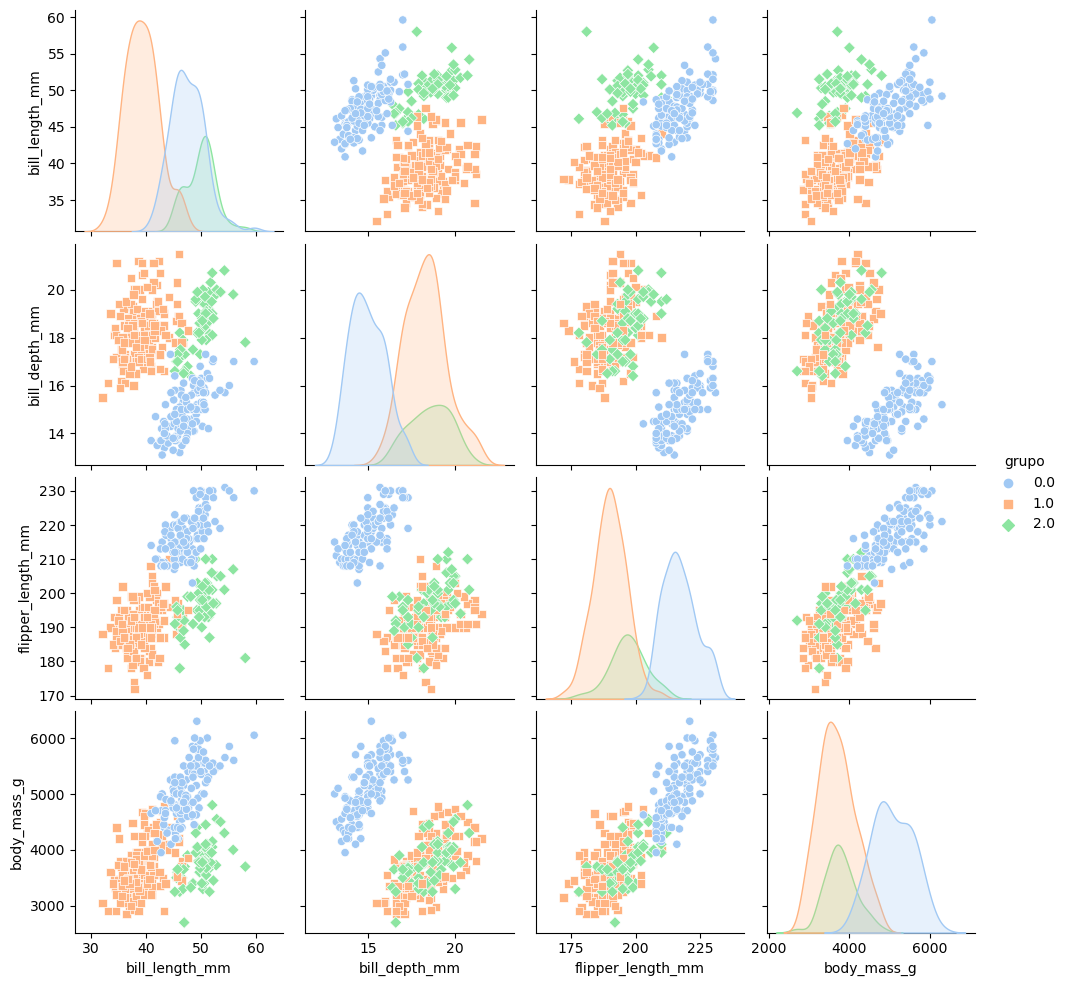

In [10]:
sns.pairplot(data=data1, hue='grupo', markers=["o", "s", "D"], palette='pastel')

## 3) Alterando o agrupamento

O Dendrogarma sugere que podem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [11]:
clus = AgglomerativeClustering(linkage='complete',
                               distance_threshold = None,
                               n_clusters=5)
clus.fit(data_pad)

data_num['grupos'] = clus.labels_
data_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo,grupos
id,,,,,,
0,39.1,18.7,181.0,3750.0,1,4
1,39.5,17.4,186.0,3800.0,1,4
2,40.3,18.0,195.0,3250.0,1,4
4,36.7,19.3,193.0,3450.0,1,4
5,39.3,20.6,190.0,3650.0,1,2


In [17]:
data2 = data.merge(data_num['grupos'], how='left', on='id')
data2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupos
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,4.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,4.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,4.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,4.0


In [18]:
data2.select_dtypes(include='number').dropna().head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupos
id,,,,,
0,39.1,18.7,181.0,3750.0,4.0
1,39.5,17.4,186.0,3800.0,4.0
2,40.3,18.0,195.0,3250.0,4.0
4,36.7,19.3,193.0,3450.0,4.0
5,39.3,20.6,190.0,3650.0,2.0


In [19]:
pd.crosstab(data2['species'], data2['grupos'])

grupos,0.0,1.0,2.0,3.0,4.0
species,,,,,
Adelie,0,0,60,0,91
Chinstrap,54,0,9,0,5
Gentoo,0,71,0,52,0


In [22]:
pd.crosstab(data2['sex'], data2['grupos'])

grupos,0.0,1.0,2.0,3.0,4.0
sex,,,,,
Female,20,9,13,49,74
Male,34,61,55,0,18


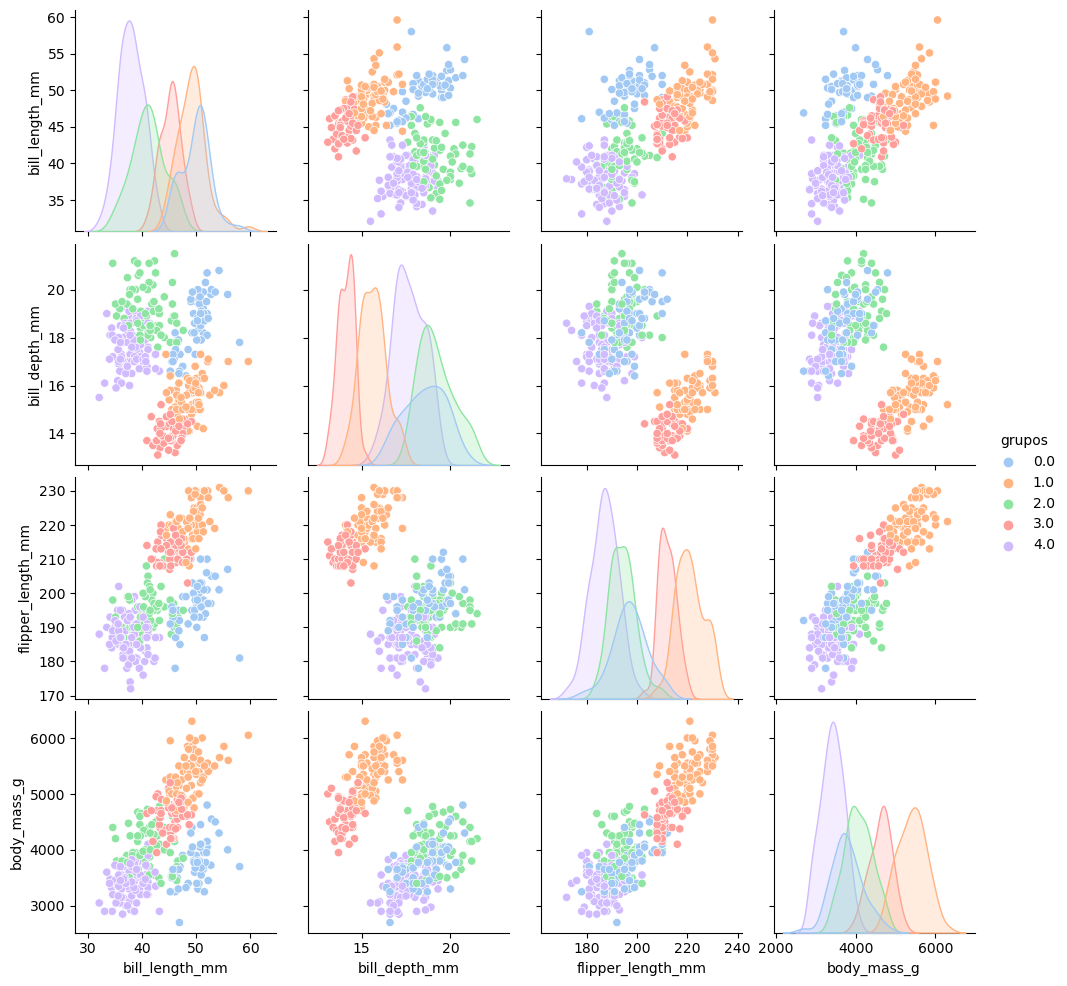

In [21]:
sns.pairplot(data=data2, hue='grupos', palette='pastel')

**R. É possível verificar que os grupos 0, 1 e 3 se mostram separados, enquanto os grupos 2 e 4 mostram sobreposição.**